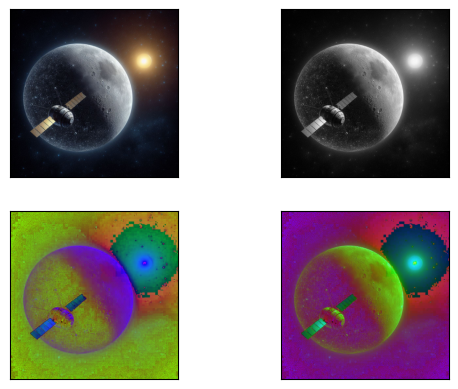

In [19]:
#pip install opencv-python

import numpy as np
import cv2
import matplotlib.pyplot as plt

# Carregans imagem
# img = cv2.imread('./imagens/FEI01.jpg')
img = cv2.imread('./Satelite.jpeg')


# Convertendo espaço de cores
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

#plot imagens
imagens = [img_rgb,img_gray,img_hsv,img_hls]

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(imagens[i],'gray')
    plt.xticks([]),plt.yticks([])
plt.show()




plt.show()


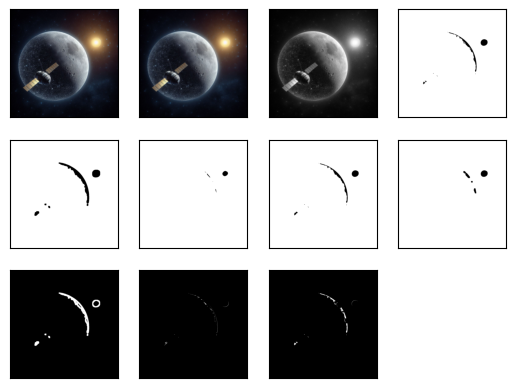

In [20]:
#pip install opencv-python
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

#Importa e converta para RGB
# img = cv2.imread('./imagens/elefante.jpg')
img = cv2.imread('./Satelite.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Filtro de ruído (bluring)
img_blur = cv2.blur(img,(5,5))

#Convertendo para preto e branco (RGB -> Gray Scale -> BW)
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_RGB2GRAY)
a = img_gray.max()
_, thresh = cv2.threshold(img_gray, a/2+100, a,cv2.THRESH_BINARY_INV)

#preparando o "kernel"
kernel = np.ones((12,12), np.uint8)


#operadores Morfologicos
img_dilate = cv2.dilate(thresh,kernel,iterations = 1)
img_erode = cv2.erode(thresh,kernel,iterations = 1)
img_open = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
img_close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
img_grad = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel)
img_tophat = cv2.morphologyEx(thresh, cv2.MORPH_TOPHAT, kernel)
img_blackhat = cv2.morphologyEx(thresh, cv2.MORPH_BLACKHAT, kernel)

# Plot the images
imagens = [img, img_blur,  img_gray,thresh,img_erode,img_dilate, img_open, img_close, img_grad,
          img_tophat, img_blackhat]

formatoX = math.ceil(len(imagens)**.5)
if (formatoX**2-len(imagens))>formatoX:
    formatoY = formatoX-1
else:
    formatoY = formatoX

for i in range(len(imagens)):
    plt.subplot(formatoY, formatoX, i + 1)
    plt.imshow(imagens[i],'gray')
    plt.xticks([]),plt.yticks([])
plt.show()



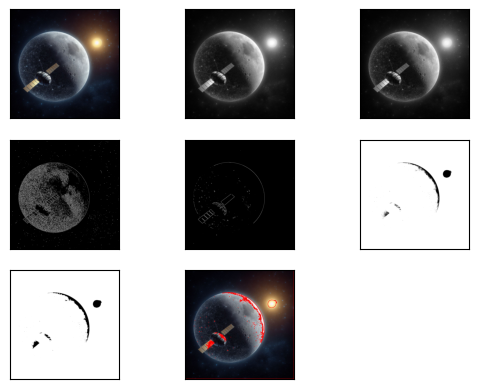

In [21]:
#pip install opencv-python

import math

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Importa e converta para RGB
# img = cv2.imread('./imagens/elefante.jpg')
img = cv2.imread('./Satelite.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



#Convertendo para preto e branco (RGB -> Gray Scale -> BW)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
a = img_gray.max()
_, thresh = cv2.threshold(img_gray, a/2*1.7, a,cv2.THRESH_BINARY_INV)


tamanhoKernel = 5
kernel = np.ones((tamanhoKernel,tamanhoKernel), np.uint8)
thresh_open = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

#Filtro de ruído (bluring)
img_blur = cv2.blur(img_gray, ksize=(tamanhoKernel,tamanhoKernel))

# Detecção borda com Canny (sem blurry)
edges_gray = cv2.Canny(image=img_gray, threshold1=a/2, threshold2=a/2)
# Detecção borda com Canny (com blurry)
edges_blur = cv2.Canny(image=img_blur, threshold1=a/2, threshold2=a/2)


# contorno
contours, hierarchy = cv2.findContours(
                                   image = thresh,
                                   mode = cv2.RETR_TREE,
                                   method = cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse = True)
img_copy = img.copy()
final = cv2.drawContours(img_copy, contours, contourIdx = -1,
                         color = (255, 0, 0), thickness = 2)


#plot imagens
imagens = [img,img_blur,img_gray,edges_gray,edges_blur,thresh,thresh_open,final]
formatoX = math.ceil(len(imagens)**.5)
if (formatoX**2-len(imagens))>formatoX:
    formatoY = formatoX-1
else:
    formatoY = formatoX
for i in range(len(imagens)):
    plt.subplot(formatoY, formatoX, i + 1)
    plt.imshow(imagens[i],'gray')
    plt.xticks([]),plt.yticks([])
plt.show()


Imagem 1

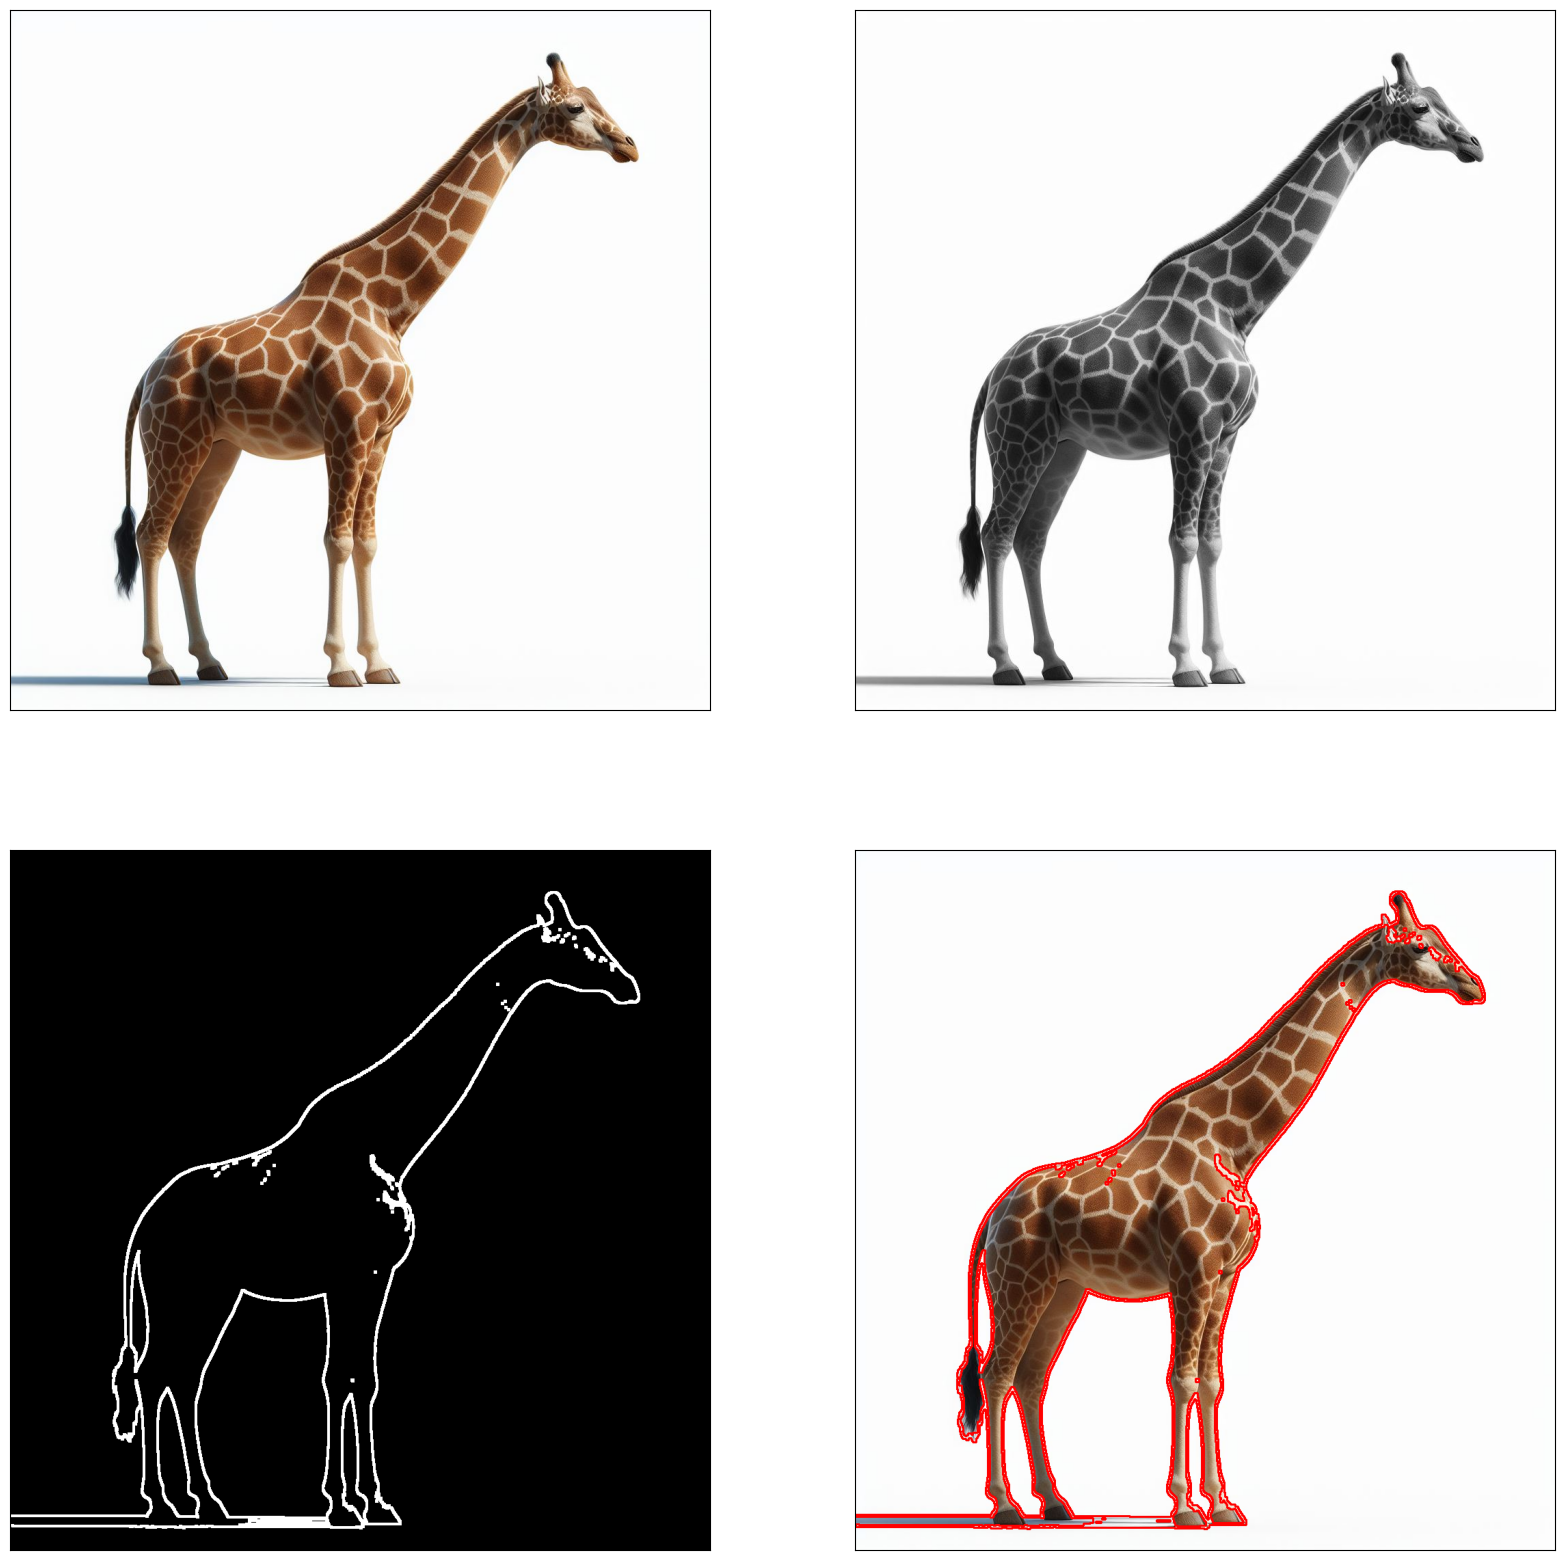

In [15]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./GIRAFA.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
a = img_gray.max()
_, thresh = cv2.threshold(img_gray, a/2+100, a,cv2.THRESH_BINARY_INV)

img_grad = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel)

thresh2 = img_grad
#img_dilate = cv2.dilate(thresh2,kernel,iterations = 1)
#thresh3 = img_dilate
#img_erode = cv2.erode(thresh2,kernel,iterations = 1)

#img_open = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

kernel = np.ones((12,12), np.uint8)

# edges_gray = cv2.Canny(image=img_gray, threshold1=a/2, threshold2=a/2)

contours, hierarchy = cv2.findContours(
                                   image = thresh2,
                                   mode = cv2.RETR_TREE,
                                   method = cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse = True)
img_copy = img.copy()
final = cv2.drawContours(img_copy, contours, contourIdx = -1,
                         color = (255, 0, 0), thickness = 2)

imagens = [img, img_gray, img_grad, final]

formatoX = math.ceil(len(imagens)**.5)
if (formatoX**2-len(imagens))>formatoX:
    formatoY = formatoX-1
else:
    formatoY = formatoX

plt.figure(figsize=(20,20))
for i in range(len(imagens)):
    plt.subplot(formatoY, formatoX, i + 1)
    plt.imshow(imagens[i],'gray')
    plt.xticks([]),plt.yticks([])
plt.show()


Imagem 2

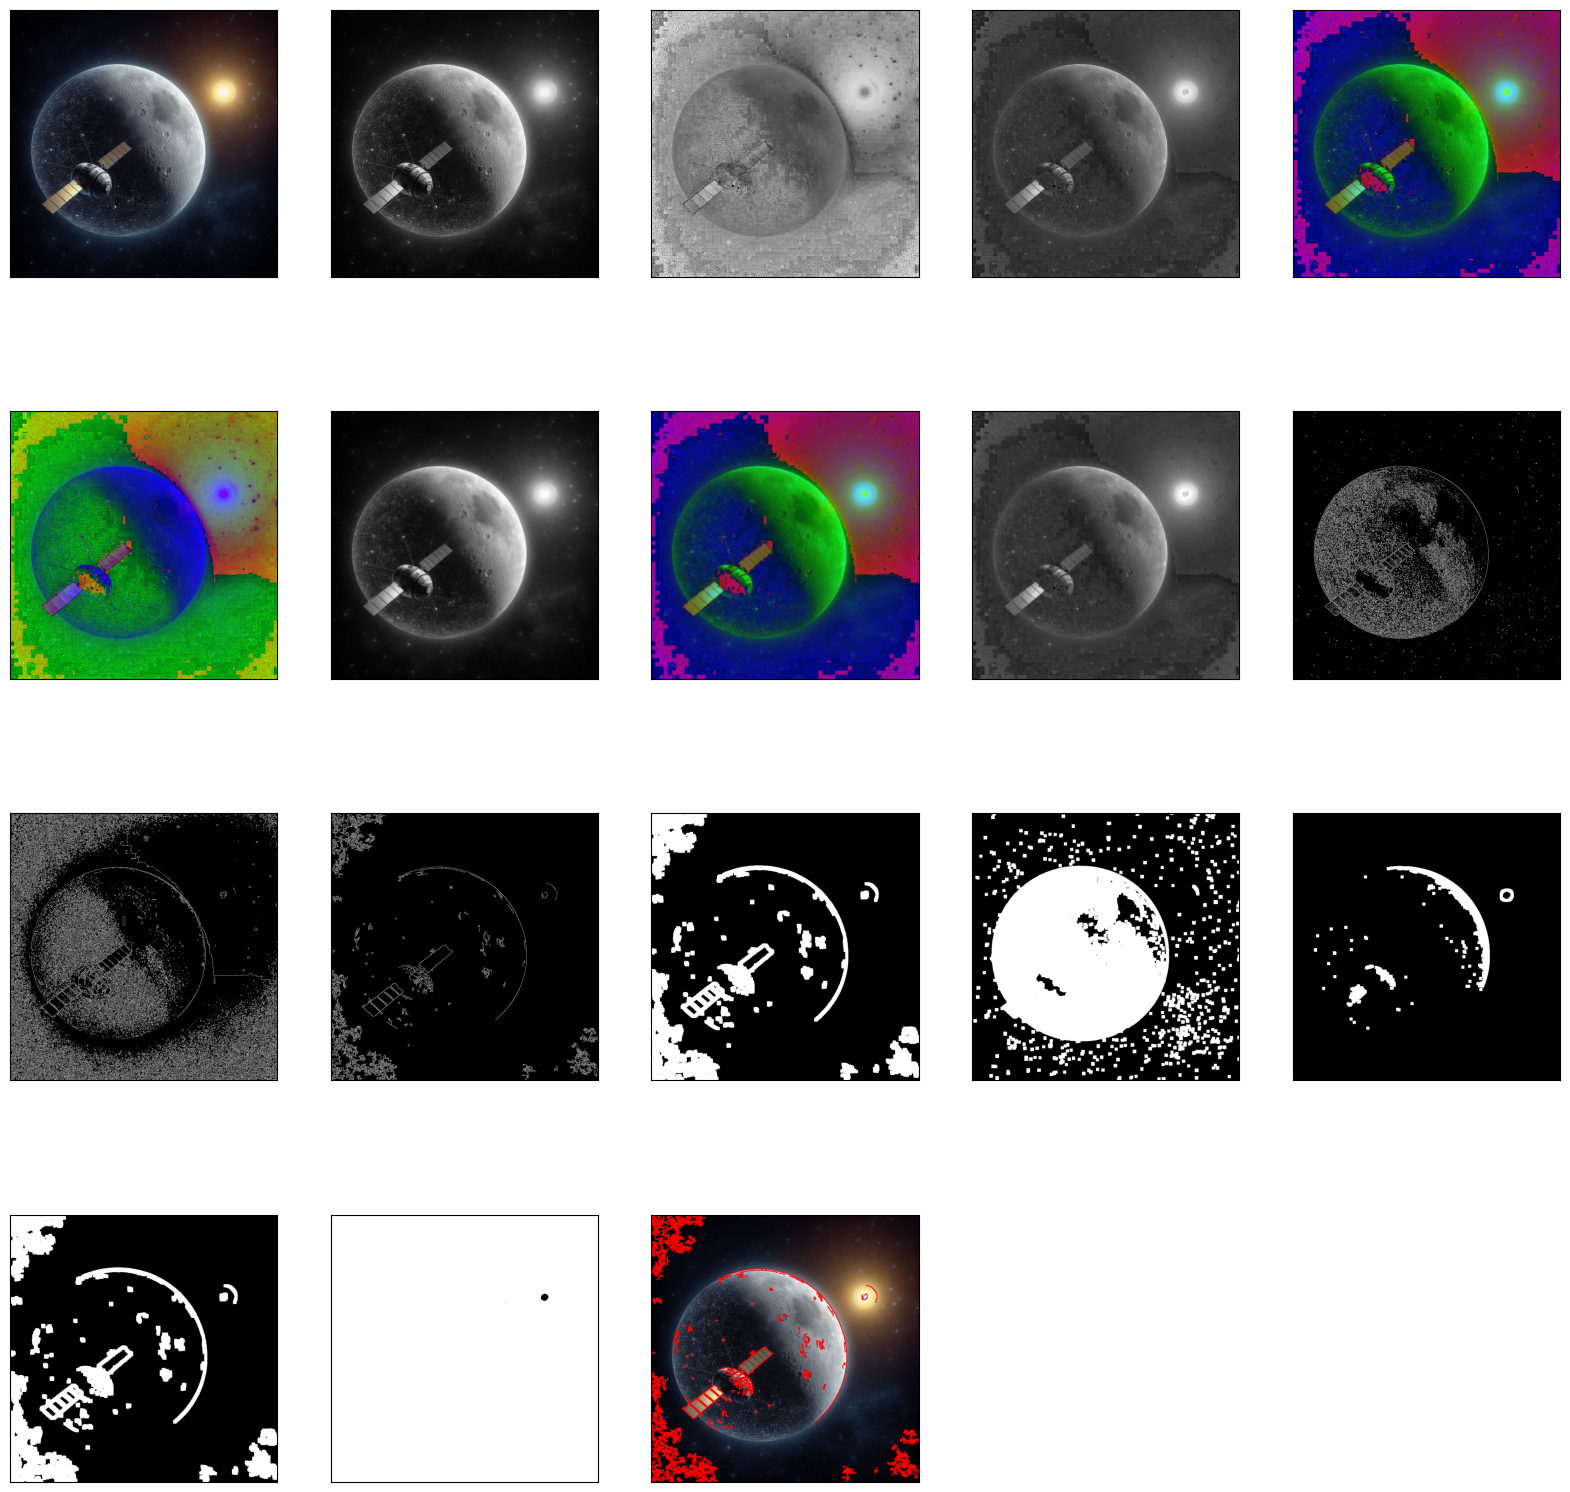

In [134]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./Satelite.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray1 = cv2.cvtColor(img_hsv, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img_hls, cv2.COLOR_BGR2GRAY)
a = img_gray.max()
_, thresh = cv2.threshold(img_gray, a/2+100, a,cv2.THRESH_BINARY_INV)
thresh3 = cv2.threshold(img_hls, a/2+100, a,cv2.THRESH_BINARY_INV)


tamanhoKernel =5
kernel = np.ones((12,12), np.uint8)
img_blur = cv2.blur(img_gray, ksize=(tamanhoKernel,tamanhoKernel))
img_blur1 = cv2.blur(img_hls, ksize=(tamanhoKernel,tamanhoKernel))
img_blur2 = cv2.blur(img_gray2, ksize=(tamanhoKernel,tamanhoKernel))
#edges_blur2 = cv2.Canny(image=img_blur2, threshold1=a/4.4, threshold2=a/4.4)
edges_blur2 = cv2.Canny(image=img_blur2, threshold1=a/3, threshold2=a/20)
edges_blur = cv2.Canny(image=img_gray, threshold1=a/2, threshold2=a/2)
edges_blur1 = cv2.Canny(image=img_hls, threshold1=a*1.2, threshold2=a*1.1)
img_grad1= cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel)
img_grad = cv2.morphologyEx(edges_blur, cv2.MORPH_GRADIENT, kernel)
img_grad2 = cv2.morphologyEx(edges_blur2, cv2.MORPH_GRADIENT, kernel)
img_dilate1 = cv2.dilate(thresh, kernel, iterations=1)
img_dilate = cv2.dilate(edges_blur2, kernel, iterations=1)

thresh2 = img_grad
kernel = np.ones((12,12), np.uint8)


contours, hierarchy = cv2.findContours(
                                   image = edges_blur2,
                                   mode = cv2.RETR_TREE,
                                   method = cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse = True)
img_copy = img.copy()
final = cv2.drawContours(img_copy, contours, contourIdx = -1,
                         color = (255, 0, 0), thickness = 2)

imagens = [img, img_gray, img_gray1, img_gray2, img_hls, img_hsv, img_blur, img_blur1 ,img_blur2, edges_blur, edges_blur1, edges_blur2, img_dilate, img_grad, img_grad1, img_grad2, img_dilate1, final]

formatoX = math.ceil(len(imagens)**.5)
if (formatoX**2-len(imagens))>formatoX:
    formatoY = formatoX-1
else:
    formatoY = formatoX
plt.figure(figsize=(20,20))
for i in range(len(imagens)):
    plt.subplot(formatoY, formatoX, i + 1)
    plt.imshow(imagens[i],'gray')
    plt.xticks([]),plt.yticks([])
plt.show()


Imagem 3

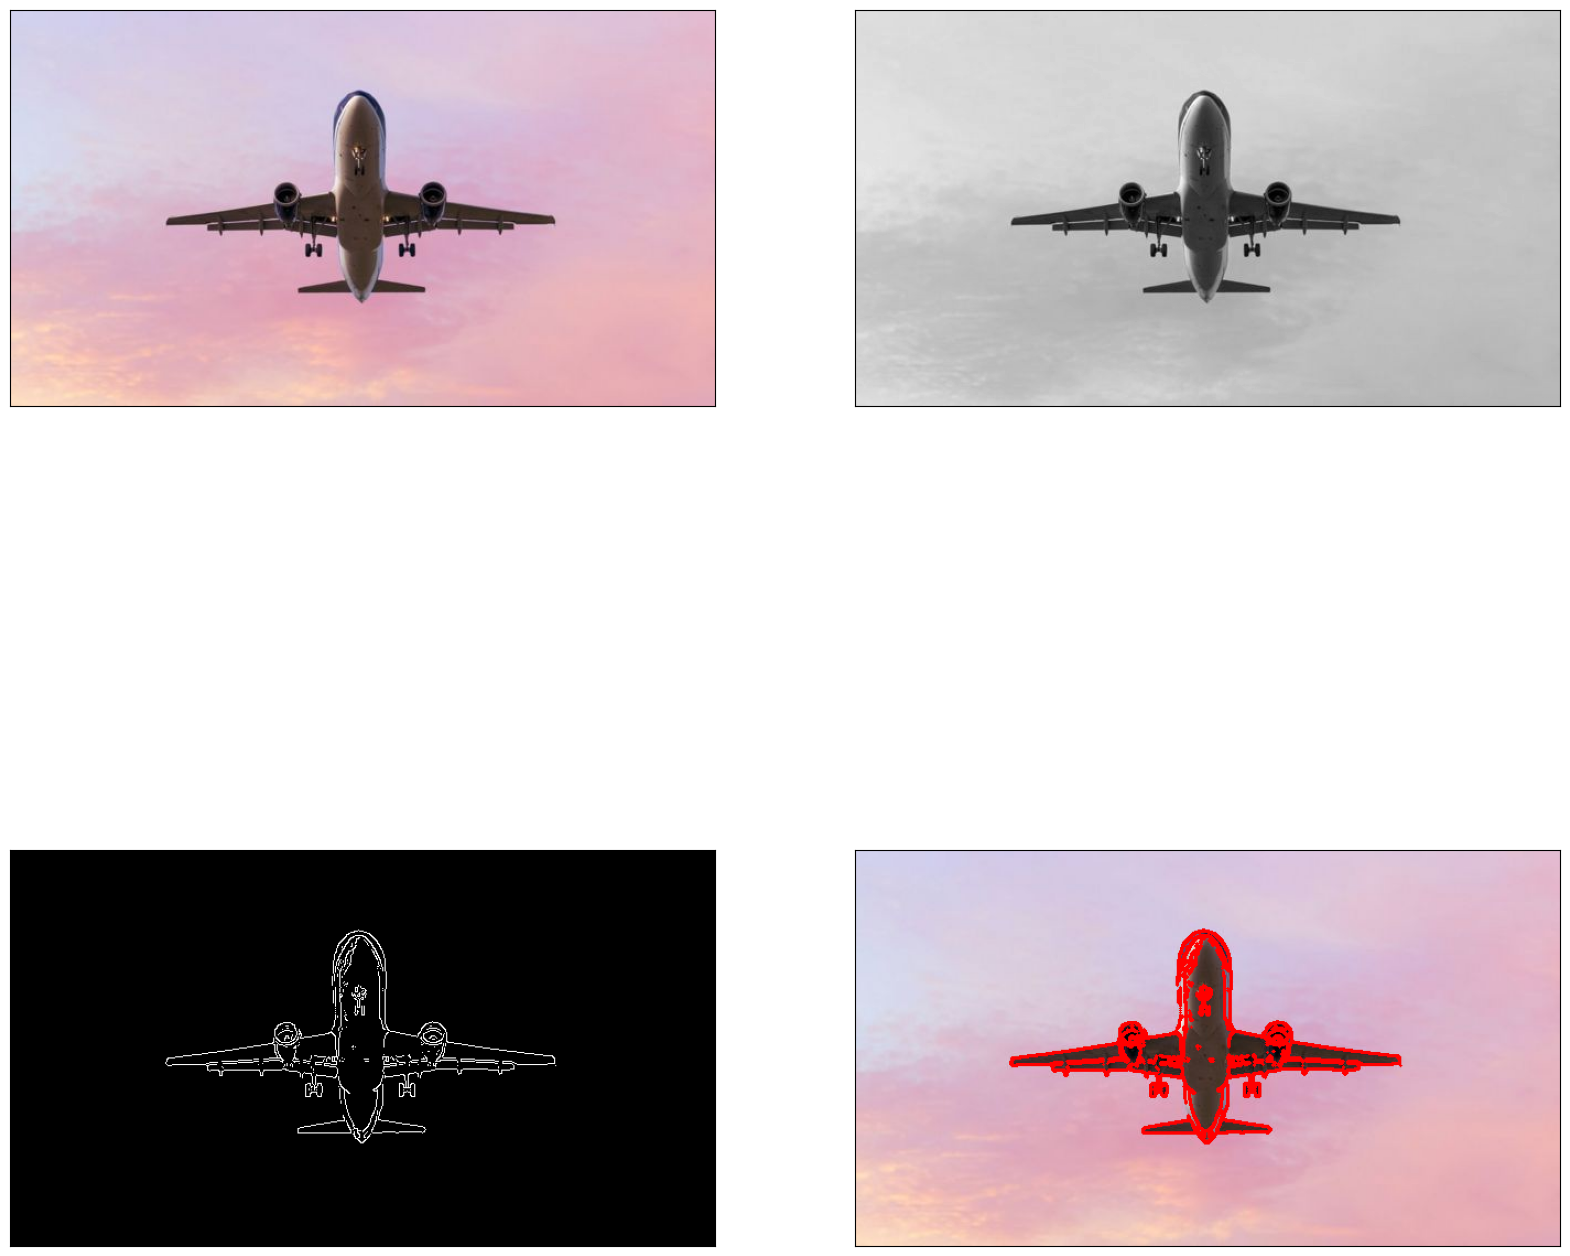

In [77]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./AVIAO_01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
a = img_gray.max()
_, thresh = cv2.threshold(img_gray, a/2+100, a,cv2.THRESH_BINARY_INV)

#img_grad = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel)

edges_gray = cv2.Canny(image=img_gray, threshold1=a/2, threshold2=a/2)

thresh2 = edges_gray
#img_dilate = cv2.dilate(thresh2,kernel,iterations = 1)
#thresh3 = img_dilate
#img_erode = cv2.erode(thresh2,kernel,iterations = 1)

#img_open = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

kernel = np.ones((12,12), np.uint8)

# edges_gray = cv2.Canny(image=img_gray, threshold1=a/2, threshold2=a/2)

contours, hierarchy = cv2.findContours(
                                   image = thresh2,
                                   mode = cv2.RETR_TREE,
                                   method = cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse = True)
img_copy = img.copy()
final = cv2.drawContours(img_copy, contours, contourIdx = -1,
                         color = (255, 0, 0), thickness = 2)

imagens = [img, img_gray, edges_gray, final]

formatoX = math.ceil(len(imagens)**.5)
if (formatoX**2-len(imagens))>formatoX:
    formatoY = formatoX-1
else:
    formatoY = formatoX

plt.figure(figsize=(20,20))
for i in range(len(imagens)):
    plt.subplot(formatoY, formatoX, i + 1)
    plt.imshow(imagens[i],'gray')
    plt.xticks([]),plt.yticks([])
plt.show()
